# DataViz com Matplotlib - Visualizações Temporais

Projeto desenvolvido durante Formação Data Science da plataforma Alura

Utilização de dataset fornecido durante o curso. Dataset esse envolvendo dados de uma estação metereológica que nos fornece as seguintes variáveis para que possamos trabalhar nossas visualizações: 

* temperatura 
* pressão
* humidade 
* direção do vento
* velocidade do vento 
* dia_da_semana 
* data 

#### Realizaremos a observação da temperatura ao longo do tempo com base nessas informações

In [10]:
# importando as bibliotecas e o dataset 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#faz com que nossos gráficos sejam exibidos automaticamente
import datetime

df = pd.read_csv('dados/monitoramento_tempo.csv')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [11]:
# expondo mais nossos dados, afim de verificar dados nulos e alterações que precisaremos realizar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


Não temos nenhum dado nulo, mas precisaremos alterar os dados da coluna data, visto que o Python interpreta object como strings. E, nos será muito mais interessante trabalharmos com datetime para plotarmos nossos gráficos.

In [13]:
# realizando o tratamento necessário com datetime
df['data'] = pd.to_datetime(df['data'])

#### 1. Nossas primeiras visualizações

A ideia é gerarmos um gráfico de temperatura ao longo do tempo.

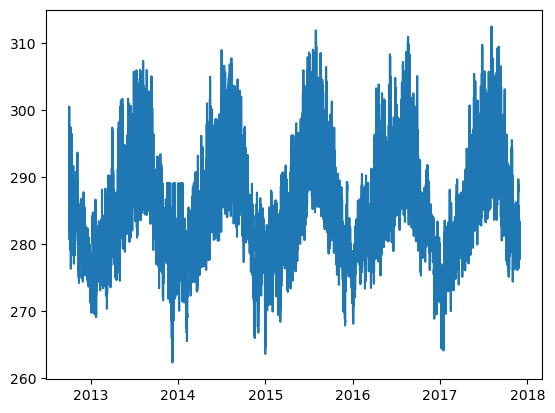

In [32]:
plt.plot(df['data'], df['temperatura'])

Identificamos que estamos trabalhando com dados de temperatura com um intervalo do final de 2012 até o final de 2017.
Notamos também que a nossa temperatura não está em Celsius e sim em Kelvin.

Deixaremos nosso gráfico maior e mais obejetivo, pois isso nos fornecerá mais clareza ao analisarmos nosso gráfico.

Text(0.5, 1.0, 'Temperatura no Tempo')

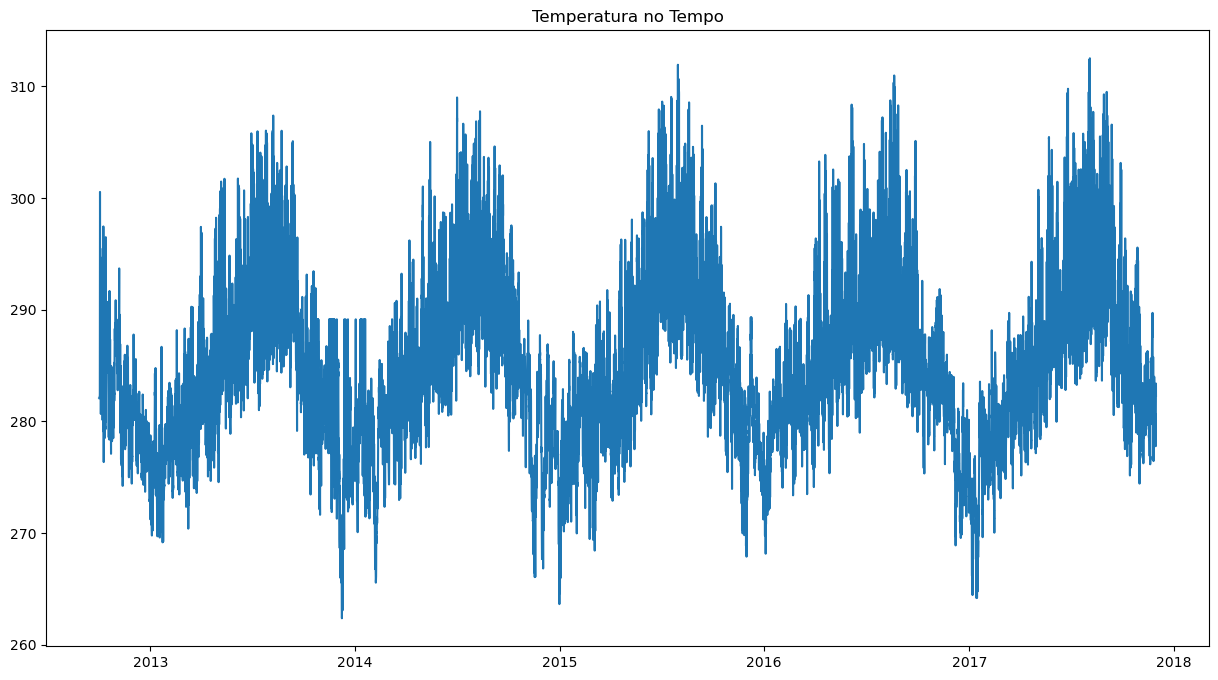

In [33]:
plt.figure(figsize=(15,8)) # definindo tamanho da figura
plt.plot(df['data'], df['temperatura'])
plt.title('Temperatura no Tempo') # inserindo um título ao nosso gráfico

Até aqui, vemos que podemos utilizar o matplotlib para visualizações simples, entretanto exploraremos mais funções básicas da biblioteca afim de obtermos algumas visualizações mais robustas.

#### 2. Gerando nossas visualizações gráficas do zero

Criaremos aqui uma variável que chamaremos de 'fig' que receberá a chamada de plt.figure(), função que cria uma nova figura. Ela receberá o parâmetro figsize para ajustarmos conforme o tamanho do gráfico anterior. Além disso, criaremos uma variável 'eixo' recebendo a função fig.add_axes(), que nos permitirá adicionar os eixos x e y a nossa figura. Ela receberá como argumento uma lista contendo os pontos em que esse eixo será desenhado, nesse caso 0, 0, 1, 1.

Nosso próximo código então irá gerar uma figura vazia para que passemos os parâmetros desejados para ele e melhorarmos ainda mais nossa observação. 

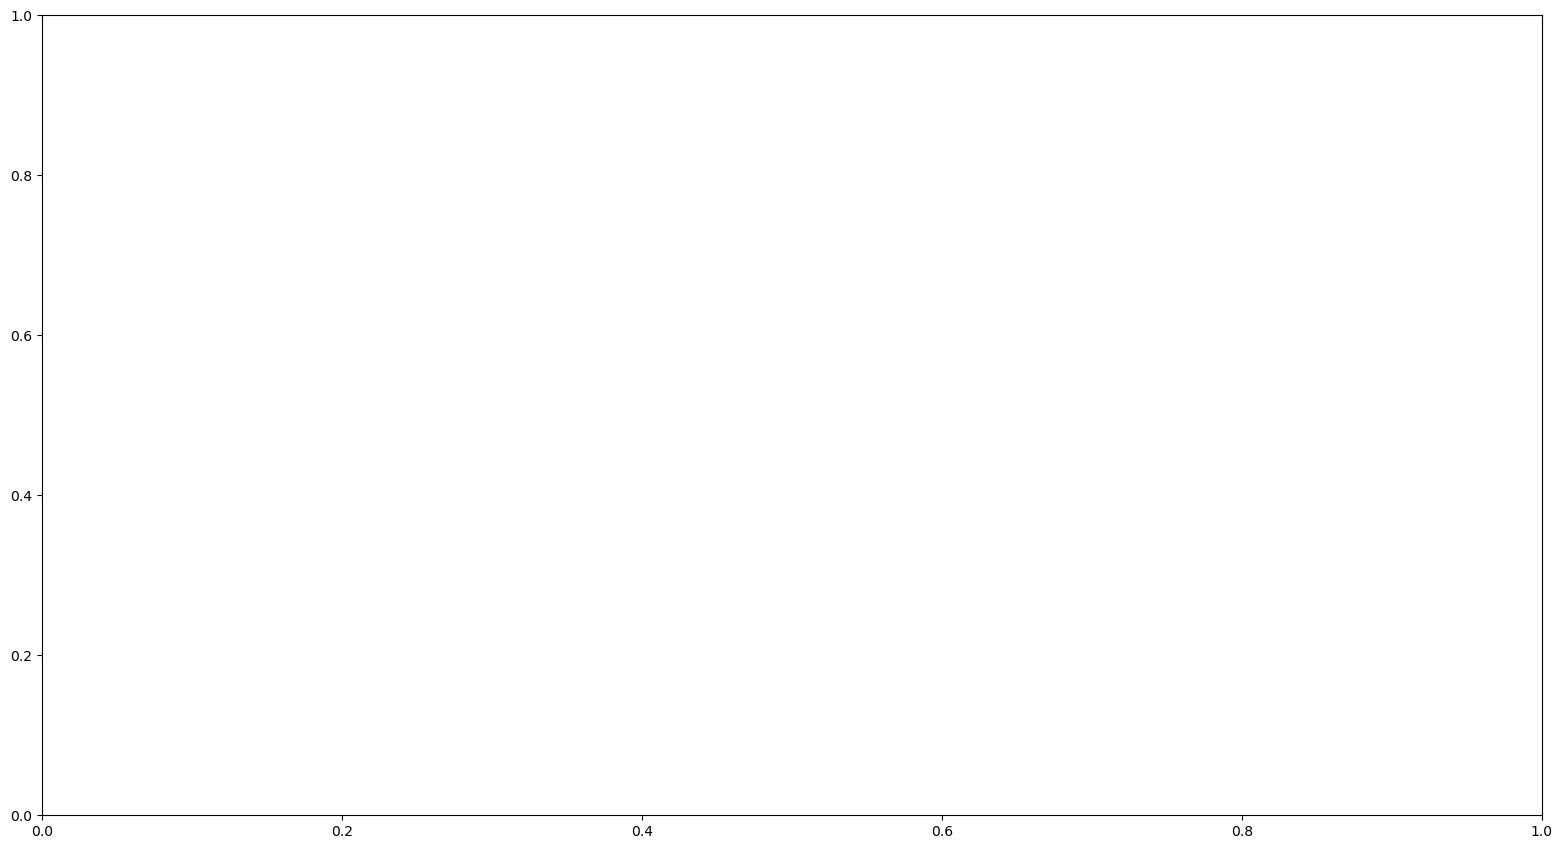

In [60]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])

Text(0.5, 0, 'Data')

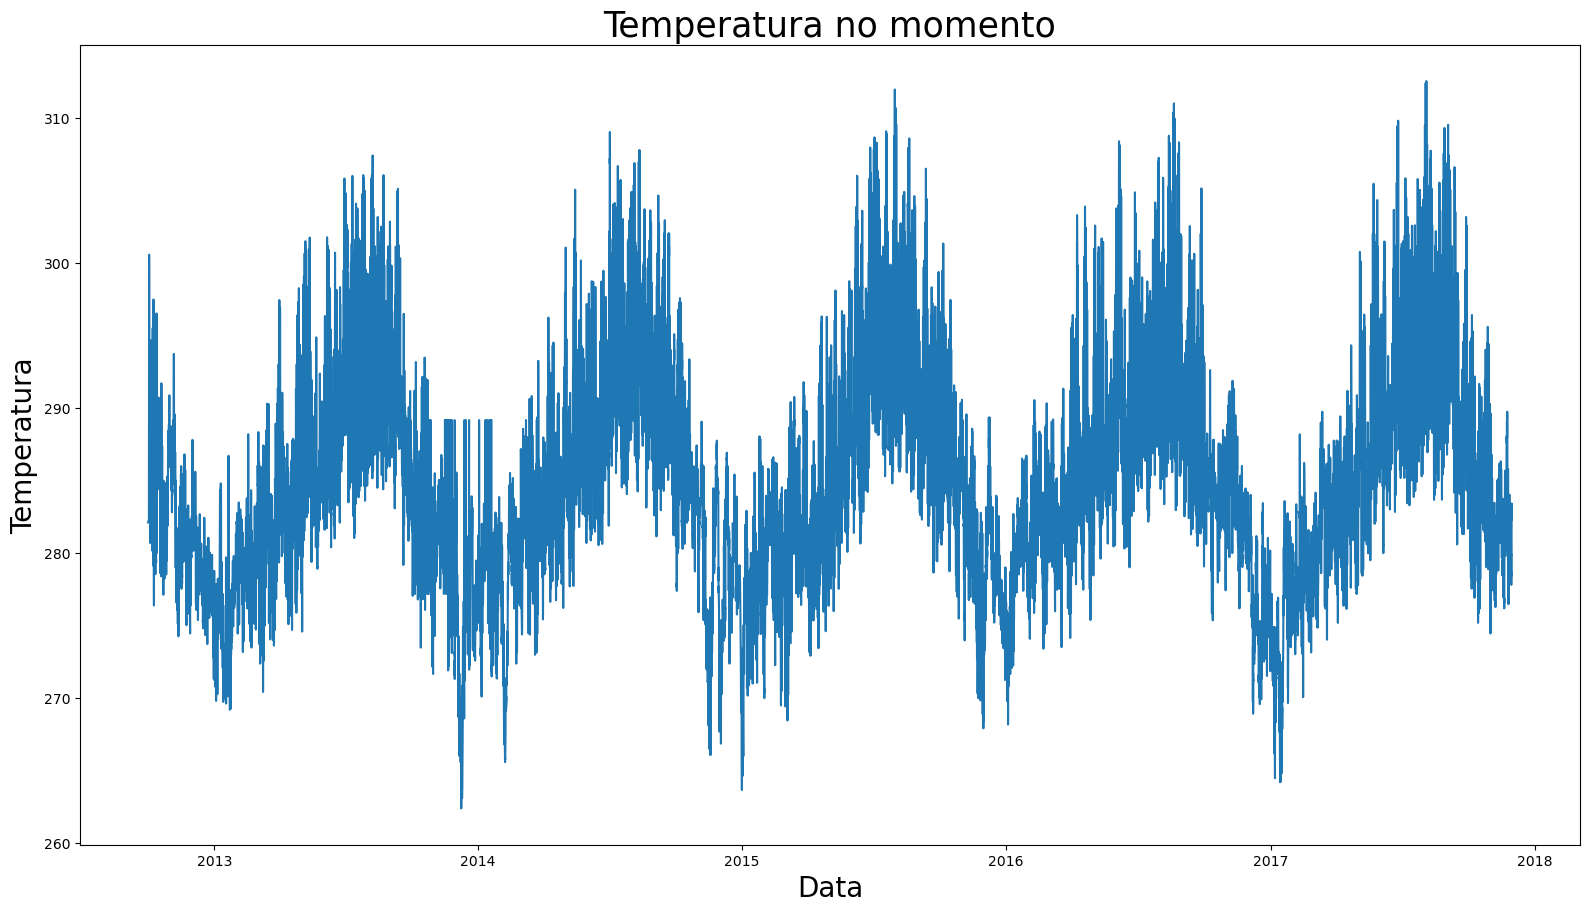

In [61]:
# Aqui, criaremos manualmente nosso último gráfico completo e passaremos a lapidá-lo
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df['data'], df['temperatura'])

eixo.set_title('Temperatura no momento', fontsize=25)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)

Com as variáveis fig e eixo, podemos realizar cuspomitações mais avançadas, facilitando inclusive a leitura dos dados representados visualmente. Note que na nossa primeira plotagem, não temos um nome para os eixos x e y, o que pode acabar dificultando para algumas pessoas o que está a ser observado.

Também podemos inserir uma legenda em nosso gráfico, pois é bem comum vermos gráficos com alguma legenda inclusa no mesmo para melhor interpretação do observador. Inseriremos uma legenda e alteraremos a cor do nosso gráfico, pois a biblioteca também nos permite tal alteração.

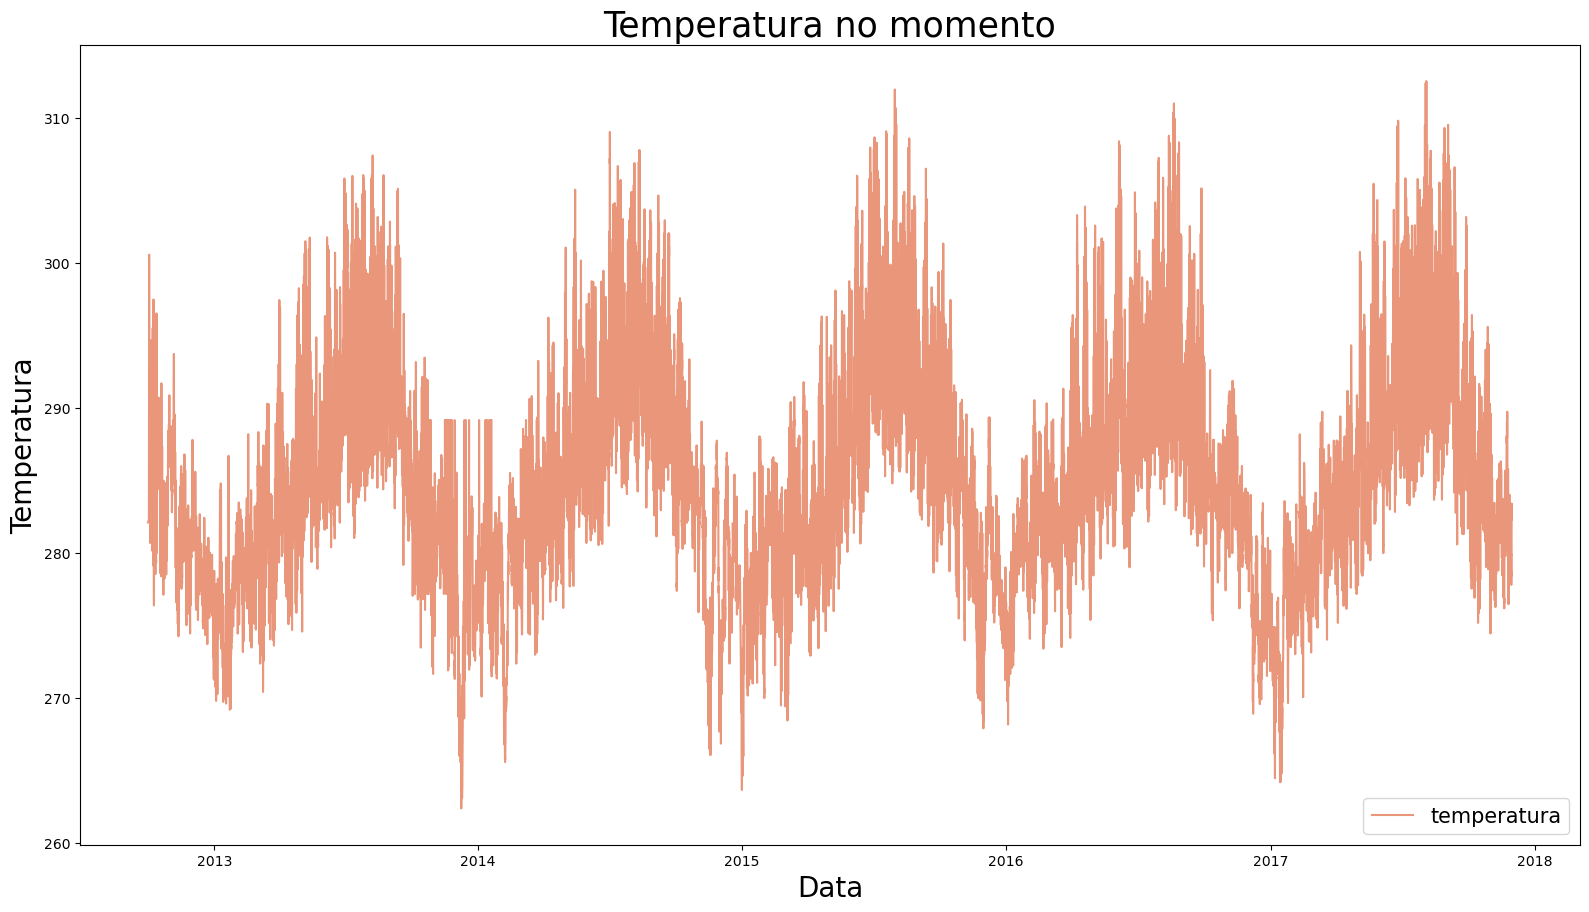

In [62]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df['data'], df['temperatura'], color = 'darksalmon') #definindo uma cor

eixo.set_title('Temperatura no momento', fontsize=25) #título do nosso gráfico e ajuste do tamanho da fonte
eixo.set_ylabel('Temperatura', fontsize=20) #label eixo y e ajuste de tamanho da fonte
eixo.set_xlabel('Data', fontsize=20) #label eixo x e ajuste de tamanho da fonte
eixo.legend(['temperatura'], loc='lower right', fontsize=15) #legenda

#### 3. Customizando nosssas visualizações

Sabemos que a biblioteca nos fornece diversas formas de visualizarmos e melhorarmos nossa visualização gráfica. 
Utilizaremos aqui a que melhor nos encaixa e enfatizaremos um período de tempo para a nossa visualização.

Trabalharemos com a função datetime.datetime() para definir um intervalo de tempo iniciando de 01/01/2014 e se encerrando 01/01/2015.
Utilizaremos também da função grid(), visto que ela é bem interessante. Nos gerará uma grade, algo que é bem visual pois nos gera a sensação de continuidade e faz muito sentido, visto que estamos separando um intervalo de tempo de um ano da nossa visualização inicial.

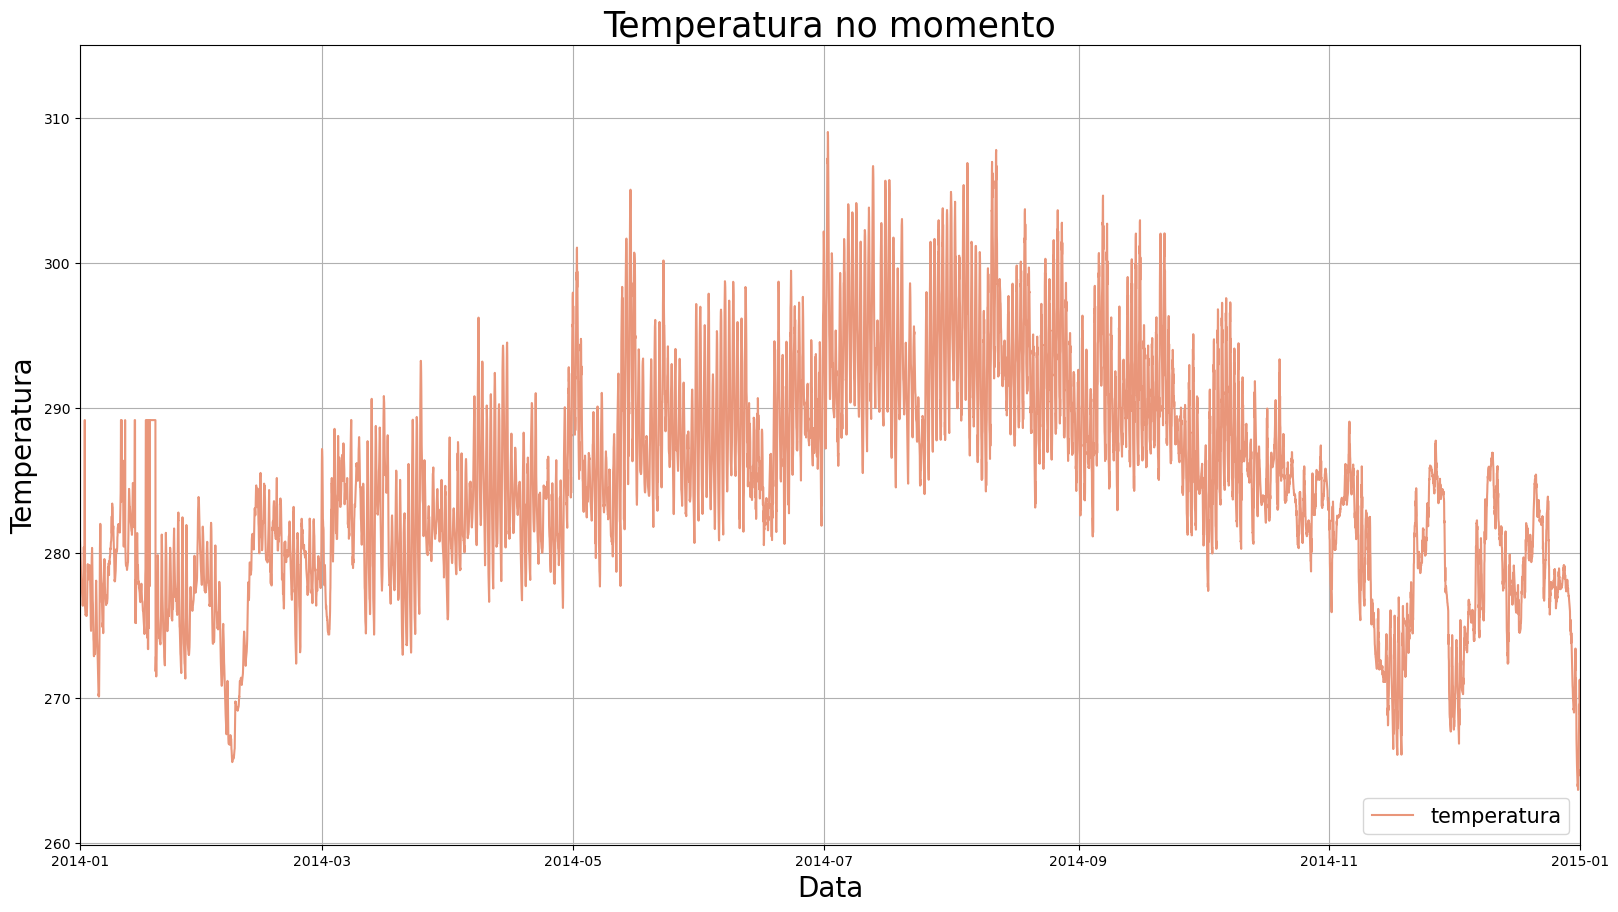

In [63]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df['data'], df['temperatura'], color = 'darksalmon')

eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo.set_title('Temperatura no momento', fontsize=25)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.legend(['temperatura'], loc='lower right', fontsize=15)
eixo.grid(True)

Agora nosso gráfico inclui uma grade que nos acrescenta novas referências para analisarmos os dados. É possível observar que há uma faixa de temperatura semelhante no início e no fim do ano, ainda que este último pareça um pouco mais frio.

Notamos que as temperaturas no início e no final do ano tendem a ser mais frias.

Isso também nos faz perceber que estamos trabalhando com dados do hemisfério norte, visto que se fosse em países como por exemplo no Brasil, nosso gráfico estaria invertido!

Agora, podemos também fazer uma visualização dentro de outra visualização, como por exemplo uma visualização com foco no ano de 2014 e em um dos cantos da figura com toda a série histórica.

Faremos isso gerando nossa figura do zero novamente. 

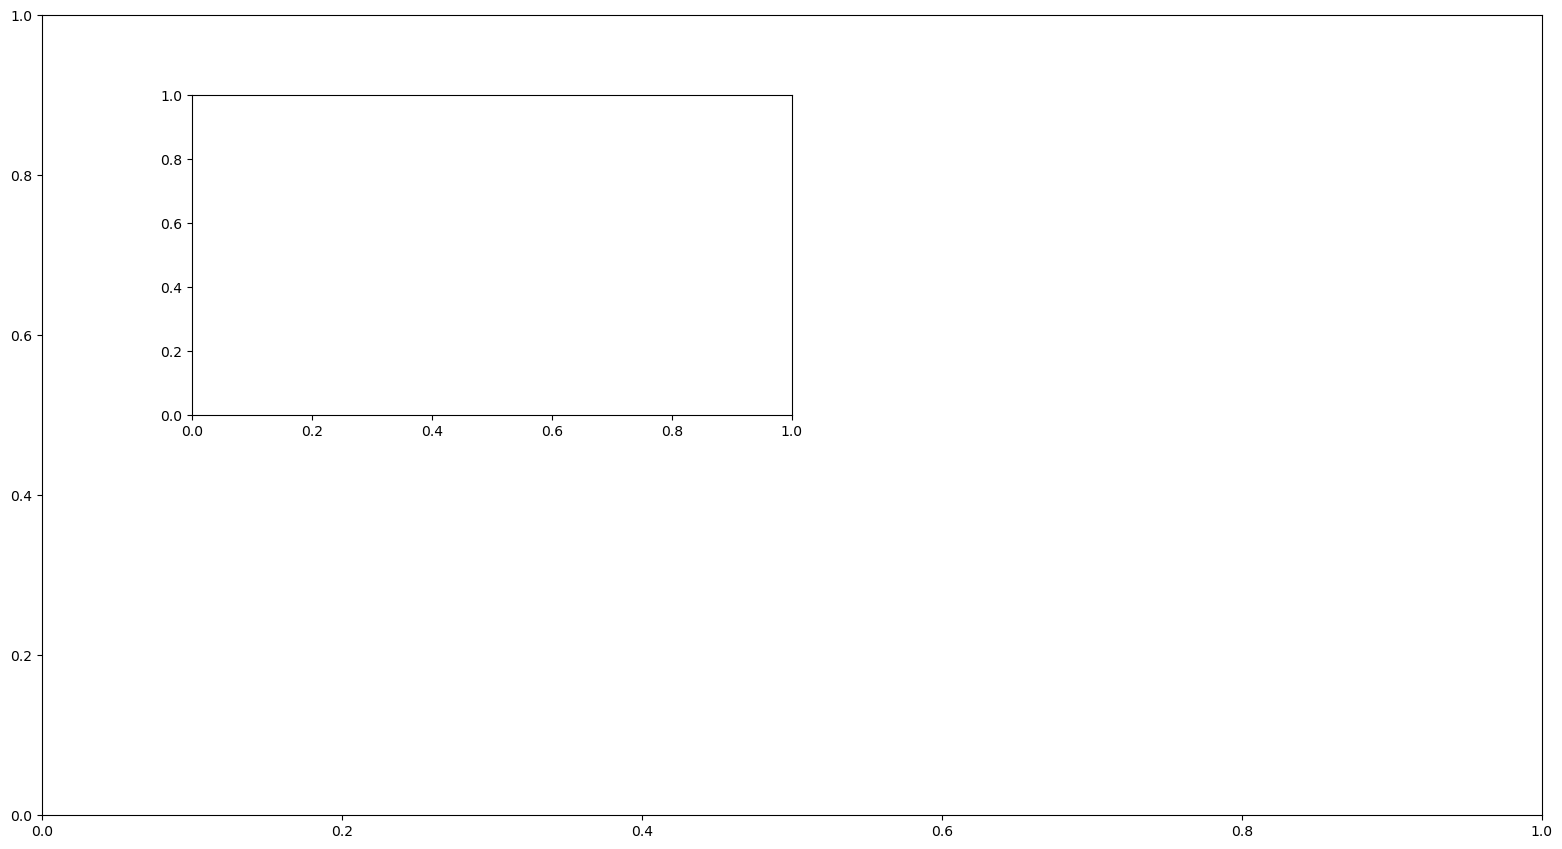

In [64]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.1, 0.5, 0.4, 0.4]) #criando o 'eixo2' que carregará nosso intervalo dentro da série histórica

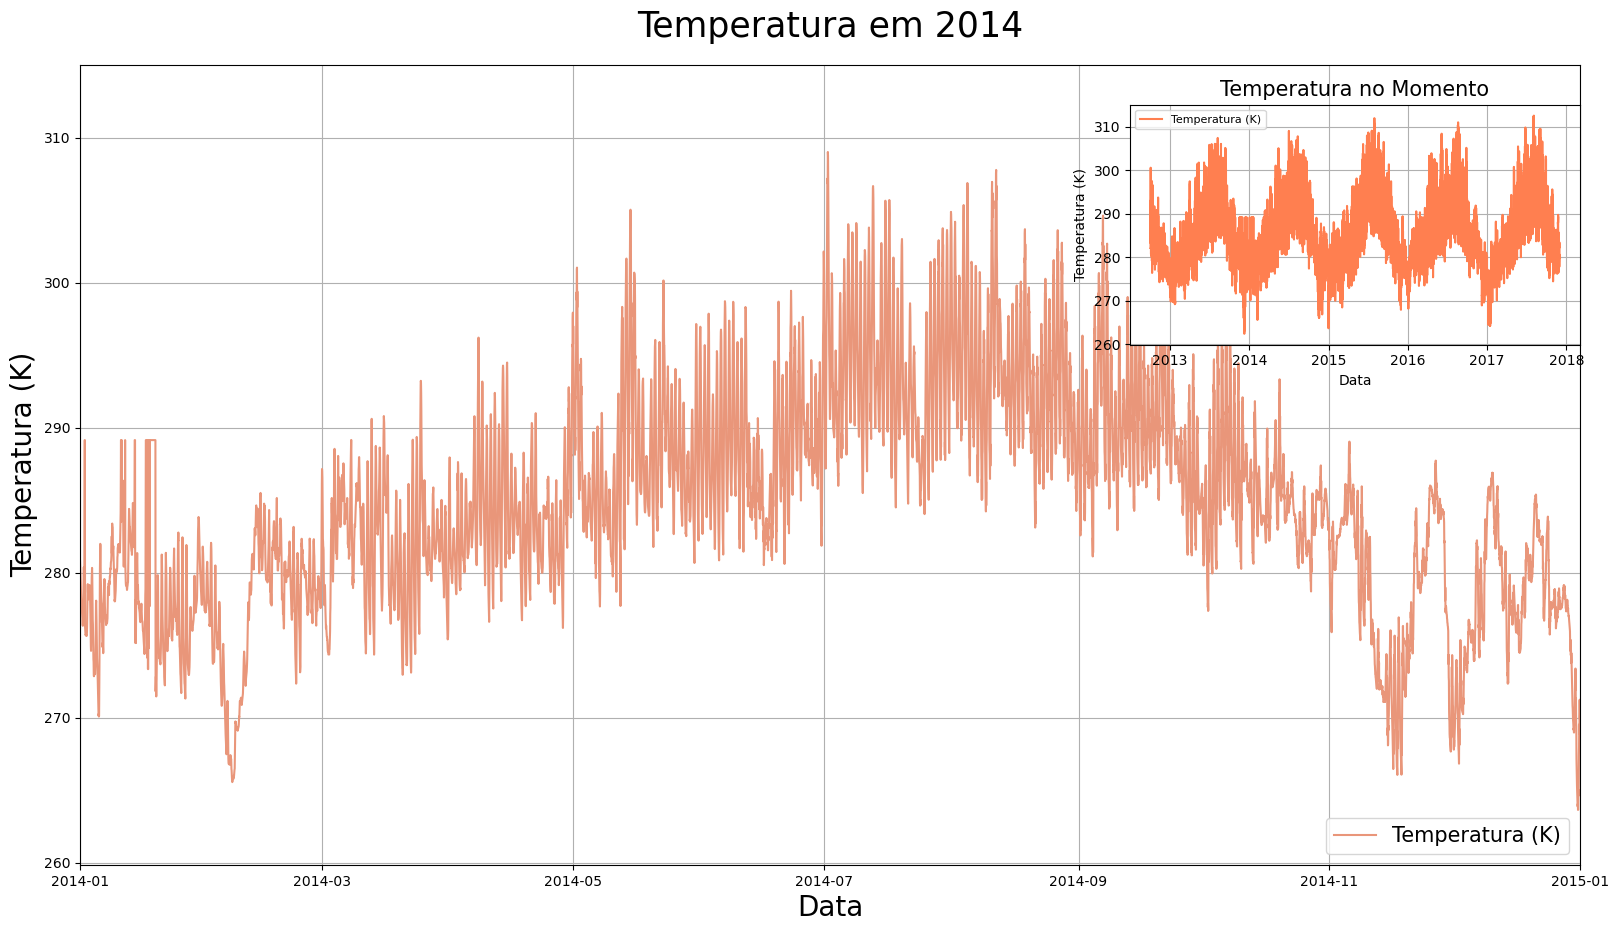

In [65]:
#Acrescentando nossos dados nos eixos! 

fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.7, 0.65, 0.3, 0.3]) #reajuste de posição do nosso gráfico da série histórica

eixo.grid(True)
eixo.plot(df['data'], df['temperatura'], color = 'darksalmon')
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo.set_title('Temperatura em 2014', fontsize=25, pad=20)
eixo.legend(['Temperatura (K)'], loc = 'lower right', fontsize=15)
eixo.set_ylabel('Temperatura (K)', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)


eixo2.plot(df['data'], df['temperatura'], color = 'coral')
eixo2.set_title('Temperatura no Momento', fontsize=15)
eixo2.legend(['Temperatura (K)'], loc = 'best', fontsize=8)
eixo2.set_ylabel('Temperatura (K)', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)
eixo2.grid(True)

Essa visualização tem o foco de mostrar todo o ano de 2014 e também mostrar toda a série histórica, mas será que existe uma forma de deixar essa visualização com a série histórica mais em evidência? E se tentassemos visualizar somente o mês de maio de 2014?

Nossa ideia agora é a de criar um foco no mês de maio com a representação maior e na menor todo o ano de 2014.

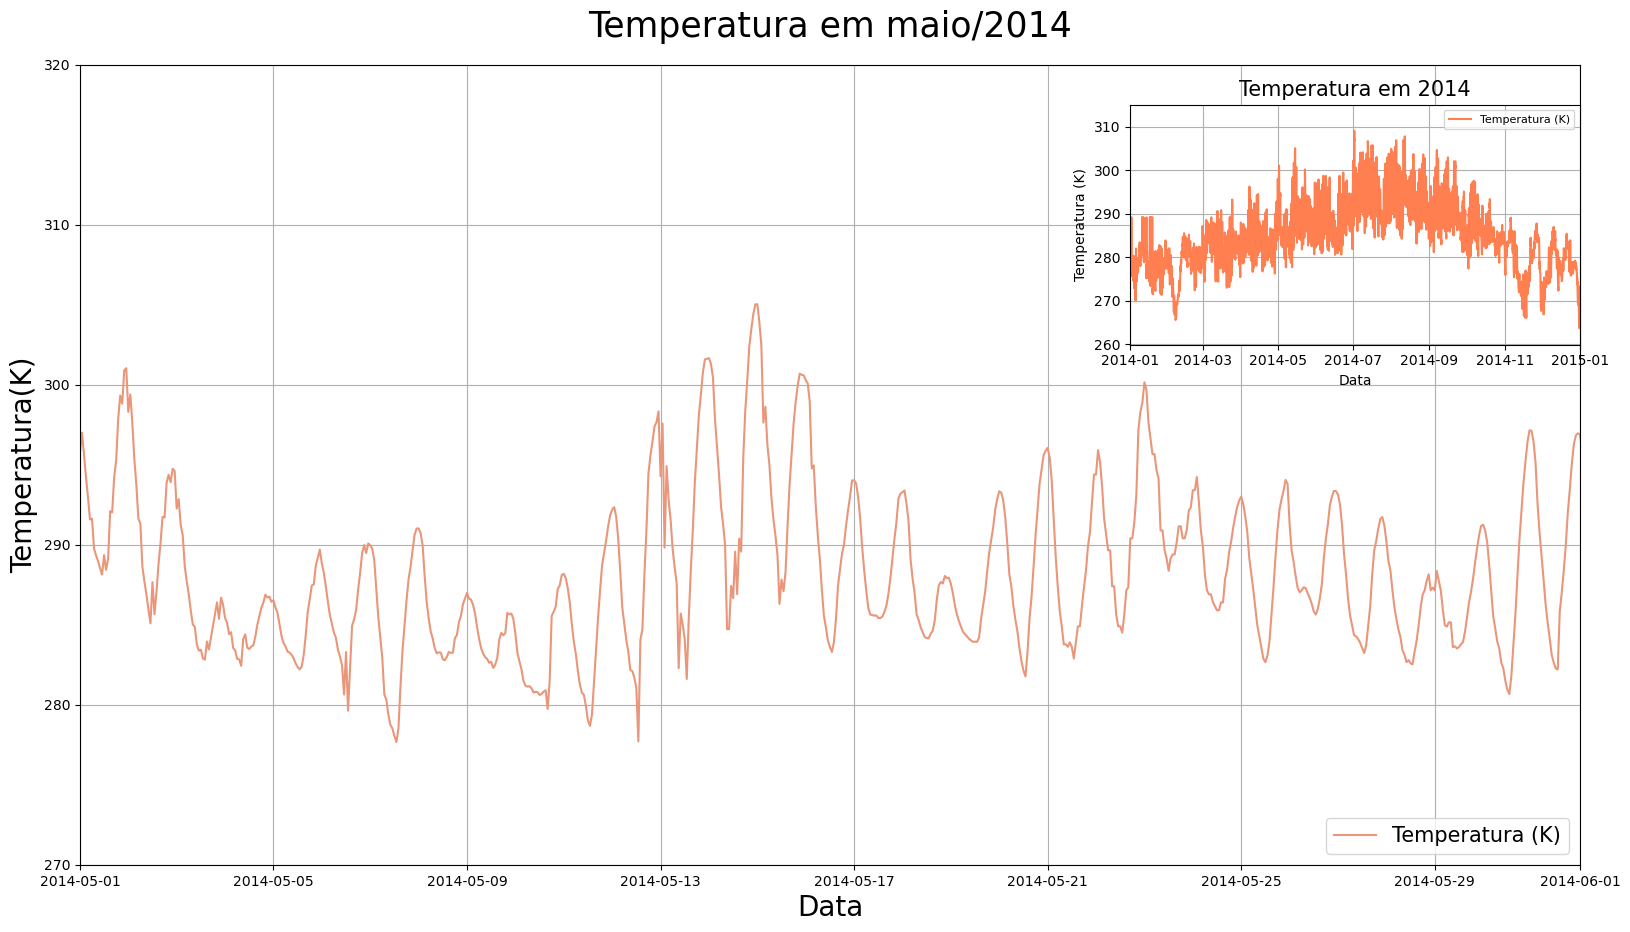

In [66]:
# Ajustando nosso código com as novas informações que queremos visualizar e renomeando nossos títulos e labels!

fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1]) 
# Corrigindo para evitar sobreposição de dados:
eixo2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])

eixo.grid(True)
eixo.plot(df['data'], df['temperatura'], color = 'darksalmon')
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1)) # definindo o intervalo do mês de maio
eixo.set_ylim(270, 320)
eixo.set_title('Temperatura em maio/2014', fontsize=25, pad=20)
eixo.legend(['Temperatura (K)'], loc = 'lower right', fontsize=15)
eixo.set_ylabel('Temperatura(K)', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)


eixo2.plot(df['data'], df['temperatura'], color = 'coral')
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1)) # definindo o intervalo do ano de 2014
eixo2.set_title('Temperatura em 2014', fontsize=15)
eixo2.legend(['Temperatura (K)'], loc = 'best', fontsize=8)
eixo2.set_ylabel('Temperatura (K)', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)
eixo2.grid(True)

Podemos realçar na visualização menor, as temperaturas do mês de maio, gerando uma associação de cores entre os dois gráficos. A ideia é aplicarmos um filtro que corresponda somente à área desejada do gráfico.

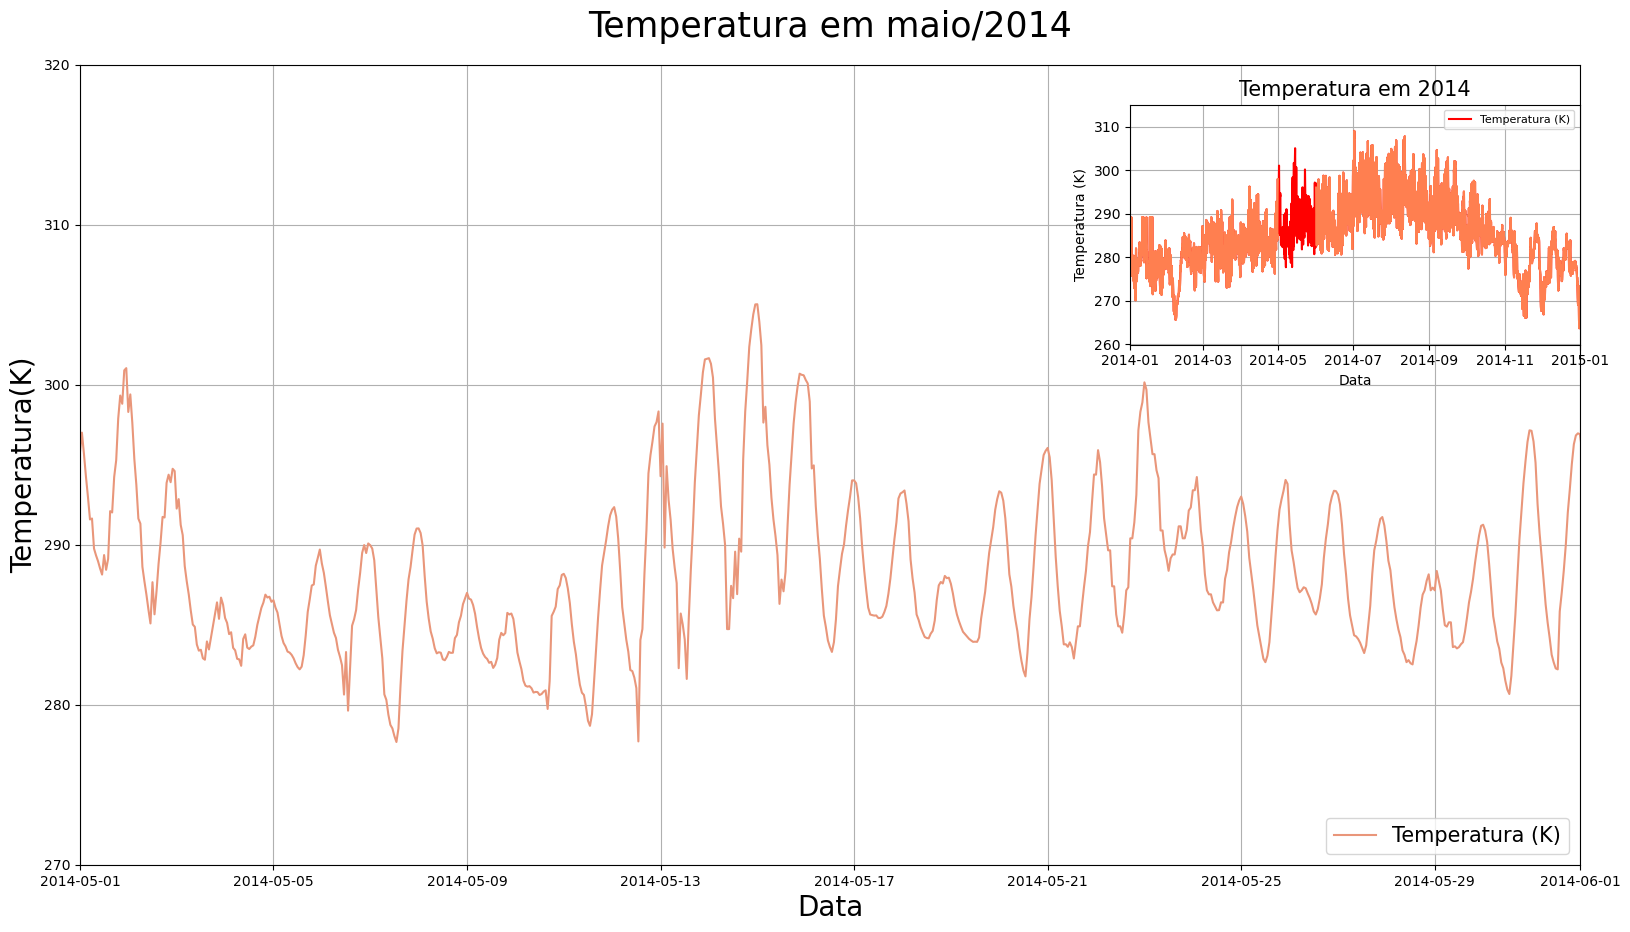

In [67]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1]) 
eixo2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])

eixo.grid(True)
eixo.plot(df['data'], df['temperatura'], color = 'darksalmon')
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1)) 
eixo.set_ylim(270, 320)
eixo.set_title('Temperatura em maio/2014', fontsize=25, pad=20)
eixo.legend(['Temperatura (K)'], loc = 'lower right', fontsize=15)
eixo.set_ylabel('Temperatura(K)', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)

cor_esquerda = df['data'] < datetime.datetime(2014,5,1)
cor_direita = df['data'] > datetime.datetime(2014,6,1)

eixo2.plot(df['data'], df['temperatura'], color = 'red')
eixo2.plot(df[cor_esquerda]['data'], df[cor_esquerda]['temperatura'], color = 'coral')
eixo2.plot(df[cor_direita]['data'], df[cor_direita]['temperatura'], color = 'coral')
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo2.set_title('Temperatura em 2014', fontsize=15)
eixo2.legend(['Temperatura (K)'], loc = 'best', fontsize=8)
eixo2.set_ylabel('Temperatura (K)', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)
eixo2.grid(True)

Conseguimos gerar uma figura bem interessante contendo tanto a visualização das temperaturas no mês de maio de 2014 quanto as do ano de 2014 em si, realçando, nesta última, o mês em foco.

Vamos realizar agora uma visualização com toda a série histórica contendo informações de máxima e mínima de temperaturas?

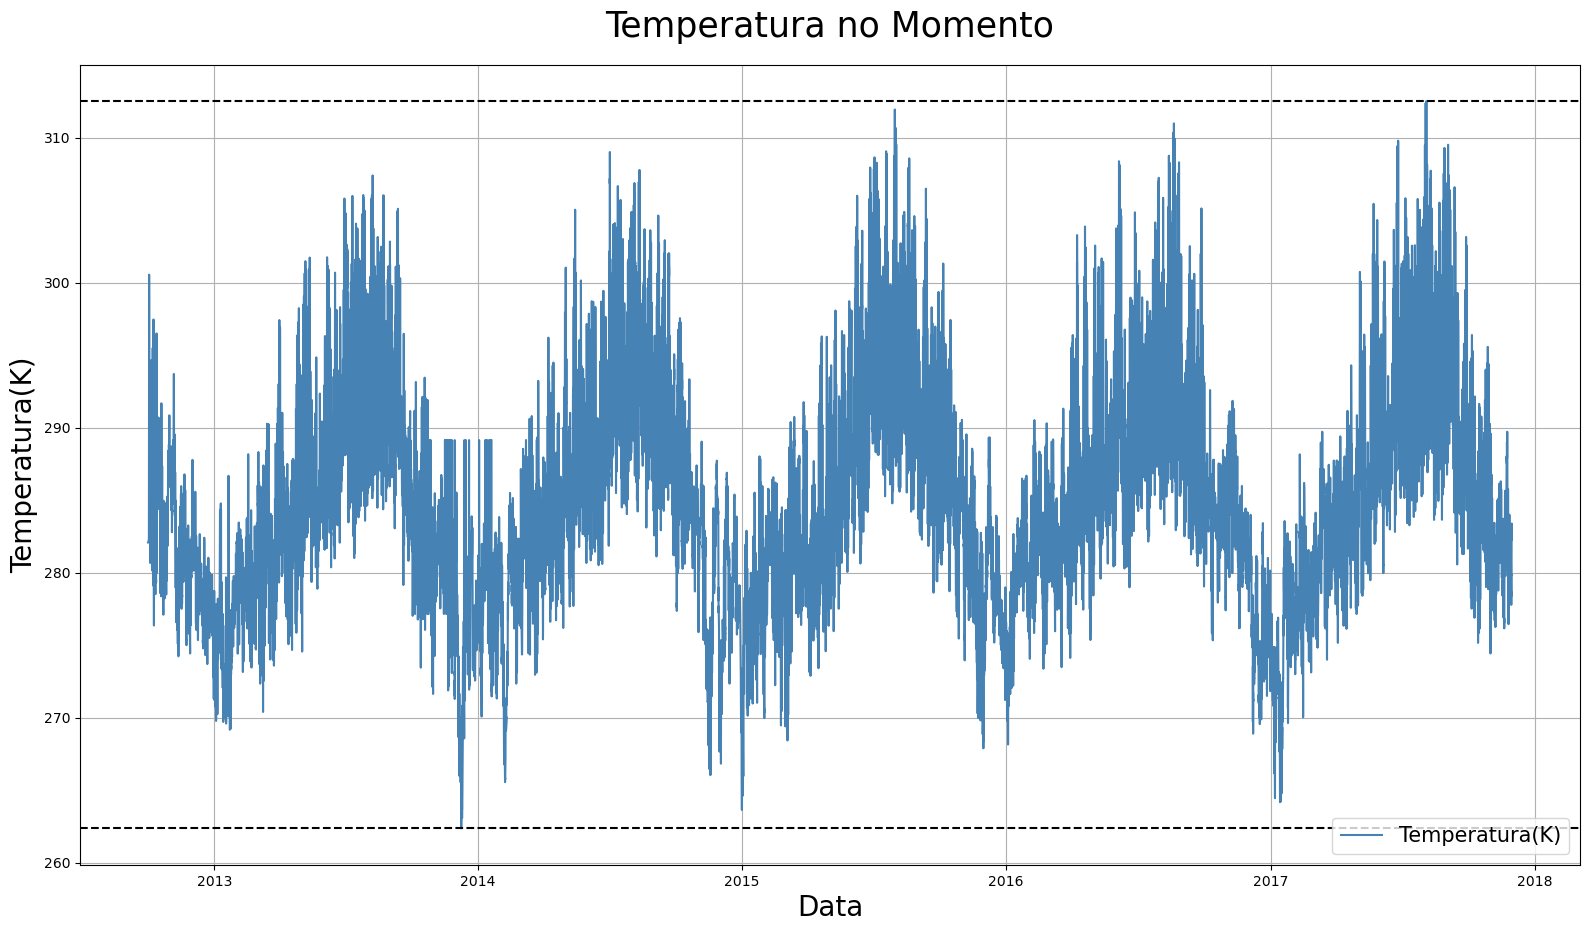

In [77]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(df['data'], df['temperatura'], color = 'steelblue')
eixo.set_title('Temperatura no Momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.set_ylabel('Temperatura(K)', fontsize = 20)
eixo.legend(['Temperatura(K)'], loc='lower right', fontsize = 15)
eixo.grid(True)

#com a função axhline() criamos linhas horizontais nas extremidades do nosso gráfico visando as temperaturas max e min
eixo.axhline(max(df['temperatura']), color = 'k', linestyle = '--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle = '--')

Será que podemos agora incluir anotações ou setas que nos permitam checar o ponto exato de máxima e mínima em nosso gráfico?

Faremos agora algumas alterações no nosso código afim de realizar alguns ajustes e fazer com que isso seja possível!

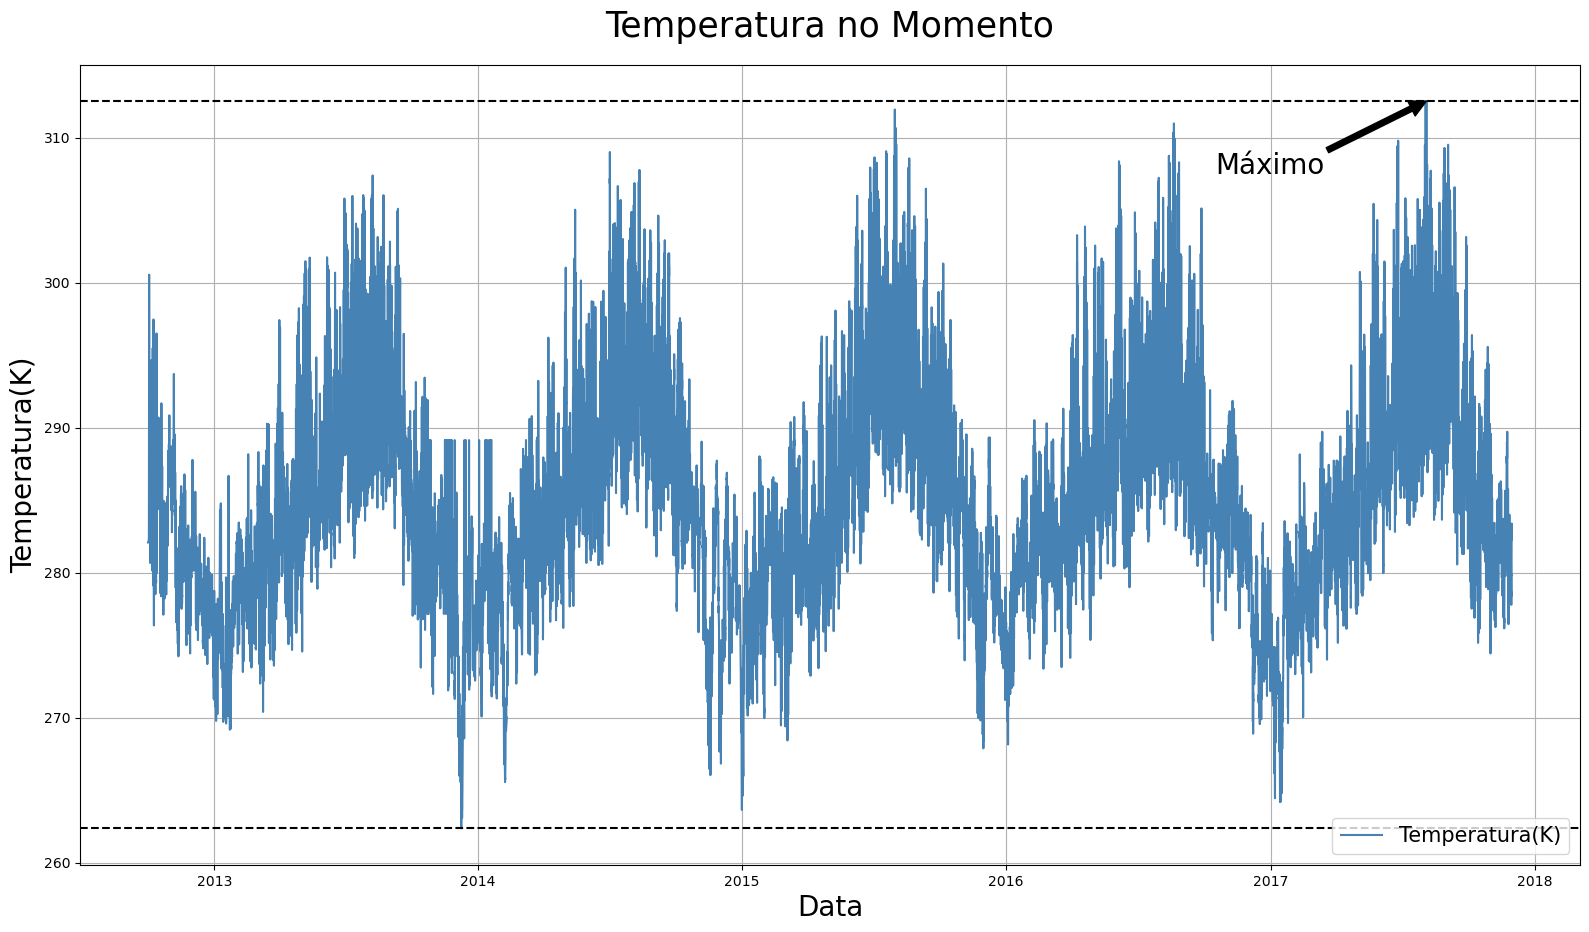

In [78]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(df['data'], df['temperatura'], color = 'steelblue')
eixo.set_title('Temperatura no Momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.set_ylabel('Temperatura(K)', fontsize = 20)
eixo.legend(['Temperatura(K)'], loc='lower right', fontsize = 15)
eixo.grid(True)

x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmax() - 7000]
y2 = max(df['temperatura']) - 5

eixo.annotate("Máximo", xy = (x1,y1), fontsize = 20, 
              xytext = (x2,y2), arrowprops = dict(facecolor='k'))

eixo.axhline(max(df['temperatura']), color = 'k', linestyle = '--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle = '--')

Agora faremos os ajustes para o ponto mínimo do gráfico!

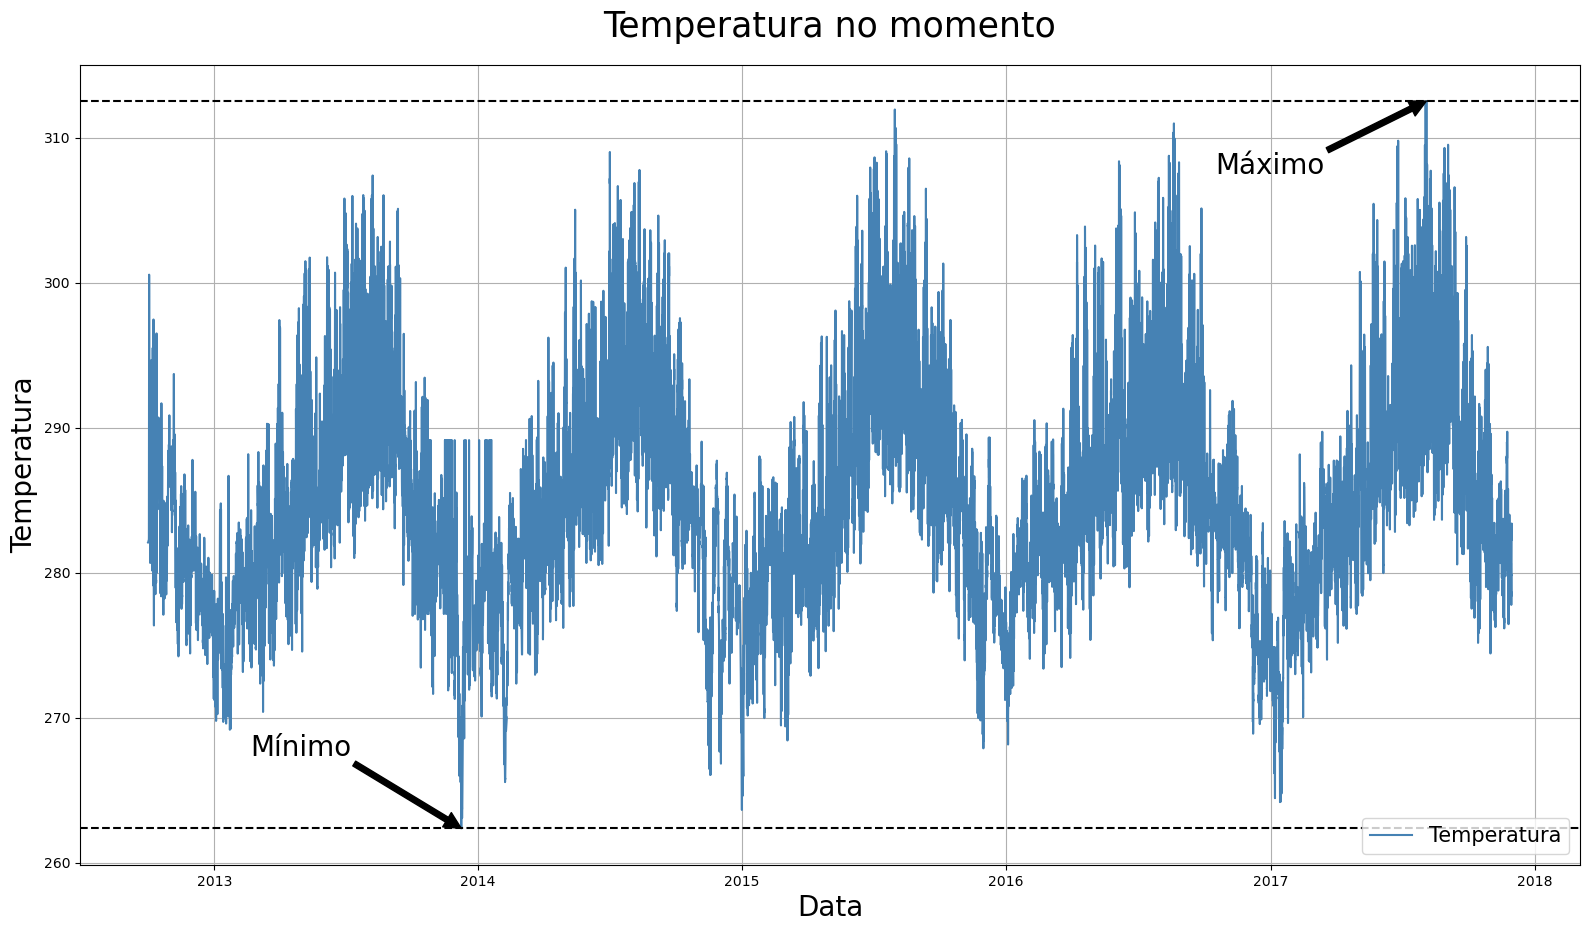

In [79]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(df['data'], df['temperatura'], color = 'steelblue')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.set_ylabel('Temperatura', fontsize = 20)
eixo.legend(['Temperatura'], loc='lower right', fontsize = 15)
eixo.grid(True)

x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmax() - 7000]
y2 = max(df['temperatura']) - 5

eixo.annotate("Máximo", xy = (x1,y1), fontsize = 20, 
              xytext = (x2,y2), arrowprops = dict(facecolor='k'))

x1 = df['data'][df['temperatura'].idxmin()]
y1 = min(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmin() - 7000]
y2 = min(df['temperatura']) + 5

eixo.annotate("Mínimo", xy = (x1,y1), fontsize = 20, 
              xytext = (x2,y2), arrowprops = dict(facecolor='k'))

eixo.axhline(max(df['temperatura']), color = 'k', linestyle = '--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle = '--')

#### Conclusão:

Conseguimos realizar várias visualizações temporais explorando com o Matplotlib nesse projeto e agora conseguimos inclusive a informação de máxima e mínima de toda a série histórica observada dentro do nosso dataset e adicionamos linhas e grades que nos ajudaram na visualização das alterações de temperatura ao longo do tempo no nosso dataset. Além disso, ainda pudemos focalizar um período de tempo e destacar de forma intuitiva e comparativa qual parte do gráfico estávamos nos referindo.